# Contract Secured Revenue (CSR) Simulation on OP

###  RPGF3 List ✨

In [1]:
from collections import defaultdict
from datetime import datetime, timedelta, timezone
import json
import numpy as np
import pandas as pd

from scripts.eas_lists import listify, create_eas_json

# Prep

In [2]:
# settings

DATA_DIR  = "data/RPGF3/"
DATA_PATH = DATA_DIR + "2023-11-13_RPGF3_snapshot.csv"

LIST_NAME = "Contract Secured Revenue (CSR) Simulation on OP"
LINK_BASE = "https://github.com/opensource-observer/insights/blob/main/notebooks/"
FILENAME  = "2023-11-13_RPGF3_CSR_on_OP.ipynb"
LIST_LINK = LINK_BASE + FILENAME

LIST_DESC = " ".join([
                "This list awards 1000 OP (rounded up) for every 1 ETH in L2 transaction fees on OP Mainnet.",
                "Only projects with unique, public GitHub repos AND at least one contract address",
                "included in their RPGF3 application are considered through this method. You can view",
                "additional data about the projects included in this list on https://opensource.observer.",
                "Note: lists generated by the OSO team do not include OSO in them in order to comply",
                "with voting rules, so please consider adding our project to your ballot separately. Always DYOR!"
                ]) 

LIST_CATS = [
            #'COLLECTIVE_GOVERNANCE',
            #'DEVELOPER_ECOSYSTEM', 
            'END_USER_EXPERIENCE_AND_ADOPTION', 
            #'OP_STACK'
            ]

JSON_PATH = DATA_DIR + "lists/OSO_CSR_on_OP.json"

In [3]:
# ingest data

df = pd.read_csv(DATA_PATH)
cols = ['Project ID', 'Project Name', 'OSO Slug', 'Total Txn Fees (ETH)']
df = df[cols].dropna()

len(df)

78

# Get the data to power the list

In [4]:
# run analysis

def scorer(row):
    
    if not isinstance(row['OSO Slug'], str):
        return 0
    
    fees = row['Total Txn Fees (ETH)']
    score = np.ceil(fees) * 1000
    return score
        
scores = []
for _,row in df.iterrows():
    scores.append(scorer(row))

In [5]:
# transform the results

scores_to_projects = dict(zip(df['OSO Slug'], scores))
slugs_to_ids = dict(zip(df['OSO Slug'], df['Project ID']))

# Generate the list data

In [6]:
award_amt = sum(scores_to_projects.values())
award_amt

211000.0

In [7]:
named_list = listify(scores_to_projects, award_amt)
rpgf_list = {slugs_to_ids[k]:v for k,v in named_list.items()}

78


<AxesSubplot:>

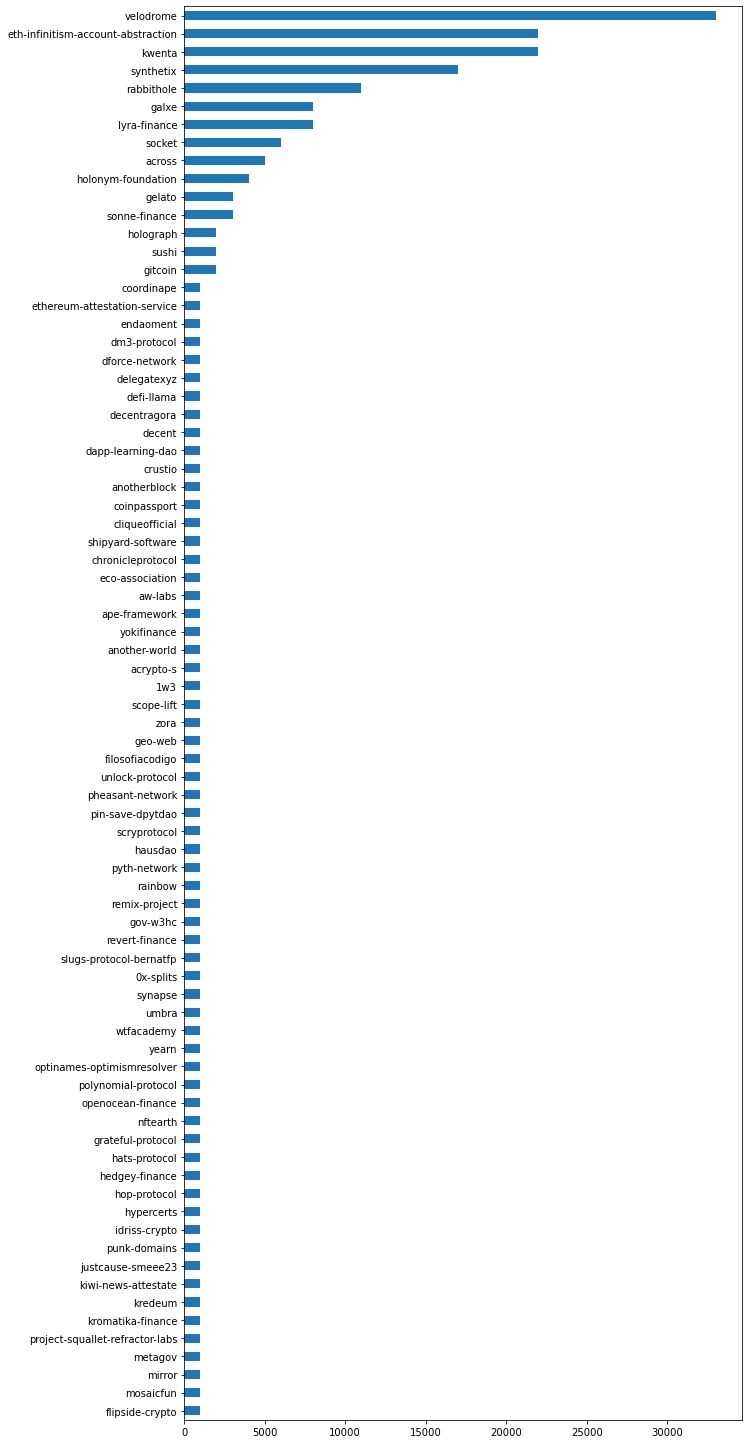

In [8]:
series = pd.Series(named_list).sort_values()
series = series[series>0]
print(len(series))
series.plot(kind='barh', figsize=(10,len(rpgf_list)/3))

In [9]:
eas_metadata = create_eas_json(rpgf_list, LIST_NAME, LIST_LINK, LIST_DESC, LIST_CATS)

In [10]:
with open(JSON_PATH, "w") as f:
    json.dump(eas_metadata, f, indent=4)